# Bank Marketing  Campaigns

# Contents:
------------------------
-  . <a href = #link100>Context:</a>
- 1. <a href = #link1>Importing Libraries</a>
- 2. <a href = #link2>Reading and Review of the dataset.</a>
- 3. <a href = #link3>EDA Discriptive Observations</a>
- 4. <a href = #link4>Transposing index and columns</a>
- 5. <a href = #link5>Checking for error, duplicates and missing vales</a>
- 6. <a href = #link6>Visualization<</a>
- 7. <a href = #link7>Univariate analysis.</a>
- 8. <a href = #link8>Multivariate analysis.</a>
- 9. <a href = #link9>Fixing Dataset errors.</a>
- 10. <a href = #link10>Checking for correlation</a>
- 11. <a href = #link11>Get Data Ready & Building Model using Sklearn Library.</a>
- 12. <a href = #link12>LogisticRegression.</a>
- 13. <a href = #link13>Logistic Regression Prediction Model</a>
- 14. <a href = #link14>Decision Tree Modeling</a>
- 15. <a href = #link15>Applying Ensemble Learning Techniques.</a>
- 16. <a href = #link16>The Decision Tree Visualization.</a>
- 17. <a href = #link17>Conclusion.</a>   
- 18. <a href = #link18>References & GitHub Link.</a>
    





# Domain: Banking  

### <a id='link100'> Context:</a>


### Goal
Using the data collected from existing customers, build a model that will help the marketing 
team identify potential customers who are relatively more likely to subscribe term deposit 
and thus increase their hit ratio. 
Resources Available
The historical data for this project is available in file
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing



**Attribute information**
**Input variables:**
**Bank client data:**

1. age: Continuous feature 
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default? 
6. housing: has housing loan? 
7. loan: has personal loan?
8. balance in account
   Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*
    Other attributes:
13. campaign: number of contacts performed during this campaign and for this 
    client
14. pdays: number of days that passed by after the client was last contacted from a 
    previous campaign (-1 tells us the person has not been contacted or contact 
    period is beyond 900 days)
15. previous: number of times the client has been contacted before for the last 
    campaign to subscribe term deposit
16. poutcome: outcome of the previous marketing campaign
    Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)


**Deliverable – 1 (Exploratory data quality report reflecting the following)**
1. Univariate analysis 
a. Univariate analysis – data types and description of the independent attributes 
which should include (name, meaning, range of values observed, central values 
(mean and median), standard deviation and quartiles, analysis of the body of 
distributions / tails, missing values, outliers.
b. Strategies to address the different data challenges such as data pollution, outlier’s 
treatment and missing values treatment.
c. Please provide comments in jupyter notebook regarding the steps you take and 
insights drawn from the plots.
2. Multivariate analysis 
a. Bi-variate analysis between the predictor variables and target column. Comment 
on your findings in terms of their relationship and degree of relation if any. 
Visualize the analysis using boxplots and pair plots, histograms or density curves. 
Select the most appropriate attributes.
b. Please provide comments in jupyter notebook regarding the steps you take and 
insights drawn from the plots


## <a id='link1'>Importing Libraries.</a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
import random

## <a id='link2'>Reading & Review of Dataset.</a> 

In [119]:
# Loading DataSet.
missing_value = ['na', '?', 'n/a', '-', '--',  '/', '???']
Bank_df = pd.read_csv('bank-full.csv', na_values= missing_value).copy()
df=Bank_df.copy()
Bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
Bank_df.shape

(45211, 17)

In [5]:
Bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
Bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [7]:
# To count and print of categorical columns.
categorical_variables=[col for col in Bank_df.columns if Bank_df[col].nunique()<=5]
print(categorical_variables)

['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'Target']


In [8]:
# To count and print of continuous variable.
continuous_variables=[col for col in Bank_df.columns if Bank_df[col].nunique()>5]
print(continuous_variables)

['age', 'job', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']


# Dataset Observation.

### Categorical Variables:
* Job (Management,BlueCollar,Technician,entrepreneur,retired,admin.,services,selfemployed,housemaid,student,unemployed,unknown)
* Marital   (Married, Single, Divorced)
* Education (Primary, Secondary, Tertiary, unknown)
* Default   (Yes/No)
* Housing   (Yes/No)
* Loan      (Yes/No)
* Contact   (Telephon, Celler, unknown)
* Poutcome. (Success,Failure,Other,Unknown)
* Month     (Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec)

### Numerical Variables.
* Age.
* Balance.
* Day.
* Duration.
* Pdays.
* Previous.

### Class.
* 'Target' Deposit  (Yes/No)

### Problem Type.
* It is a binary classification problem. two classes are 'yes' indicating that the customer subscribed to the term deposit, 
  and 'no' indicating that the customer did not subscribe.

## <a id='link3'>EDA Discriptive Observations</a> 

In [9]:
Bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [10]:
# Print dataset numerical variables.
num_var=list(Bank_df.select_dtypes(exclude='object').columns)
Bank_df[num_var]

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [11]:
# Print dataset catogorecal variables.
cat_var=list(Bank_df.select_dtypes(exclude=[np.number]).columns)
Bank_df[cat_var]

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [12]:
# Printing the mean of dataset distribution
Bank_df.mean()

age           40.936210
balance     1362.272058
day           15.806419
duration     258.163080
campaign       2.763841
pdays         40.197828
previous       0.580323
dtype: float64

In [13]:
# Printing the std of dataset distribution
Bank_df.std()

age           10.618762
balance     3044.765829
day            8.322476
duration     257.527812
campaign       3.098021
pdays        100.128746
previous       2.303441
dtype: float64

In [14]:
# Printing the median of dataset distribution
Bank_df.median()

age          39.0
balance     448.0
day          16.0
duration    180.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64

In [15]:
df=Bank_df.groupby(['education'])['balance'].mean()
df

education
primary      1250.949934
secondary    1154.880786
tertiary     1758.416435
unknown      1526.754443
Name: balance, dtype: float64

In [16]:
df=Bank_df.groupby(['education'])['balance'].median()
df

education
primary      403
secondary    392
tertiary     577
unknown      568
Name: balance, dtype: int64

In [16]:
df=Bank_df.groupby(['age'])['balance'].mean()
df

age
18     372.416667
19     539.771429
20     841.940000
21     866.759494
22     935.604651
         ...     
90     356.500000
92     775.000000
93     775.000000
94    1234.000000
95    1141.000000
Name: balance, Length: 77, dtype: float64

In [17]:
df=Bank_df.groupby(['age'])['balance'].median()
df


age
18     132.0
19     291.0
20     253.0
21     347.0
22     361.0
       ...  
90     356.5
92     775.0
93     775.0
94    1234.0
95    1141.0
Name: balance, Length: 77, dtype: float64

In [18]:
# Printing the nunique values of dataset distribution
Bank_df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

## <a id='link6'> Data Visualization.</a>



## Vistualazing the associate of the continuous variables in the dataset.

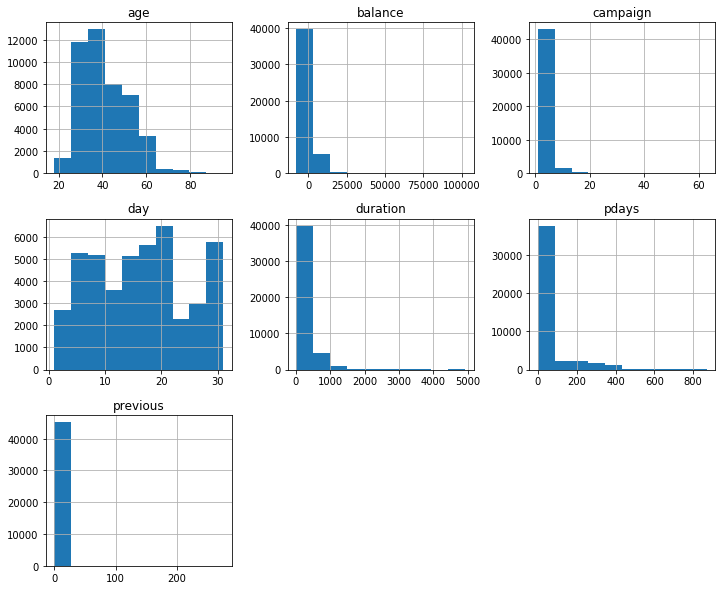

In [19]:
# Displaying the numerical features distribution in the dataset.
dist=Bank_df.hist(figsize=(12,10))

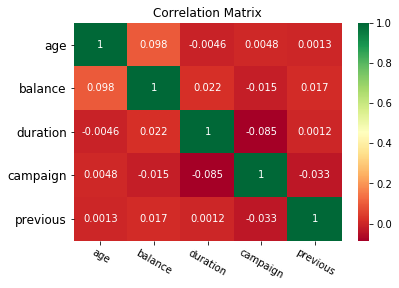

In [22]:
# checking the corrilation 
corr = Bank_df[['age','balance','duration','campaign','month','previous','Target']]
corr = corr.corr()
cor_plot=sns.heatmap(corr,annot=True,cmap='RdYlGn')
#fig=plt.figure(figsize=(10,8))
fig.set_size_inches(10,8)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=12)
plt.title('Correlation Matrix')
plt.show()

# Observation.

The heatmap matrix indicates a clear relationship among age, balance, duration, and campaign 
the correlation matrix indicates clearly with all qualitative variables that campaign outcome has 
a strong correlation with the duration and moderate correlation with previous contacts and the mid correlation 
between balance, month, contact, and the number of the campaign.

## Individual visualization of each attribute in the dataset.

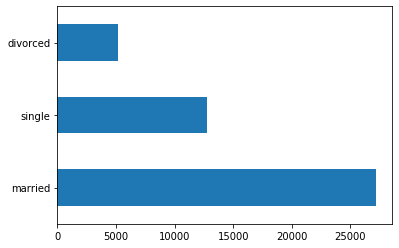

In [23]:
# Ploting marital categories and there frequency
Bank_df.marital.value_counts().plot(kind="barh")
plt.show()


In [24]:
Bank_df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

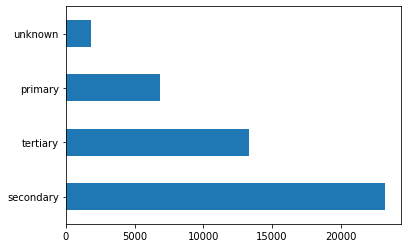

In [25]:
#Education categories and there frequency
Bank_df.education.value_counts().plot(kind="barh")
plt.show()
#sns.boxplot(Bank_df['education'], orient='y')

In [26]:
Bank_df.education.value_counts

<bound method IndexOpsMixin.value_counts of 0         tertiary
1        secondary
2        secondary
3          unknown
4          unknown
           ...    
45206     tertiary
45207      primary
45208    secondary
45209    secondary
45210    secondary
Name: education, Length: 45211, dtype: object>

#### The first line of the code below prints the skewness value for the Age variable, while the second  line prints the summary statistics

In [130]:
print(Bank_df['age'].skew())
Bank_df['age'].describe()

0.6848179257252598


count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

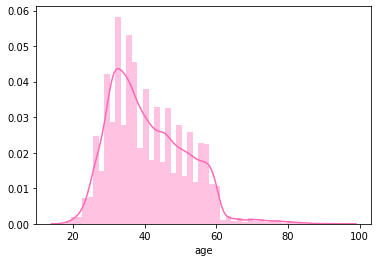

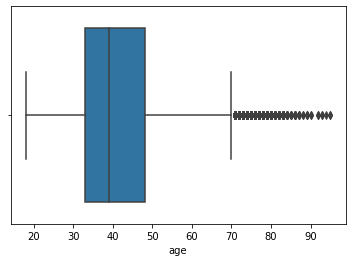

In [27]:
sns.distplot(Bank_df['age'], color='hotpink')
plt.show()
sns.boxplot(Bank_df['age'], orient='y')

In [28]:
Bank_df.age.value_counts

<bound method IndexOpsMixin.value_counts of 0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: age, Length: 45211, dtype: int64>

Text(0.5, 1.0, 'with filtering')


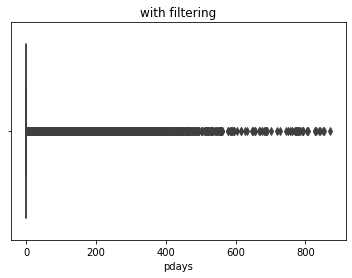

In [29]:
print(sns.boxplot(x=Bank_df['pdays']).set_title('with filtering'))

In [40]:
# Boxplot Ploting of 'pdays by limiting the relevant values of pdays
df_up = df[df.pdays != -1]

Text(0.5, 1.0, 'With filtering pdays column')


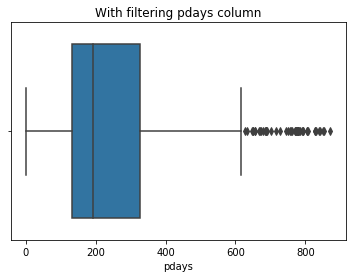

In [41]:
print(sns.boxplot(x=df_up['pdays']).set_title('With filtering pdays column'))

In [42]:
Bank_df.pdays .value_counts

<bound method IndexOpsMixin.value_counts of 0         -1
1         -1
2         -1
3         -1
4         -1
        ... 
45206     -1
45207     -1
45208    184
45209     -1
45210    188
Name: pdays, Length: 45211, dtype: int64>

#### The first line of the code below prints the skewness value for the duration variable, while the second  line prints the summary statistics.

In [128]:
print(Bank_df['duration'].skew())
Bank_df['duration'].describe()

3.144318099423456


count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

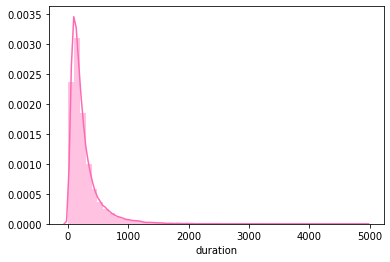

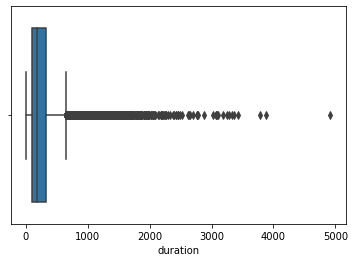

In [43]:
sns.distplot(Bank_df['duration'], color='hotpink')
plt.show()
sns.boxplot(Bank_df['duration'], orient='y')

In [44]:
Bank_df.duration.value_counts

<bound method IndexOpsMixin.value_counts of 0         261
1         151
2          76
3          92
4         198
         ... 
45206     977
45207     456
45208    1127
45209     508
45210     361
Name: duration, Length: 45211, dtype: int64>

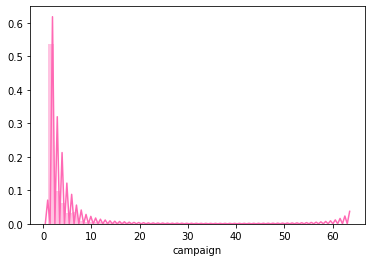

In [45]:
sns.distplot(Bank_df['campaign'], color='hotpink')
plt.show()

#### The first line of the code below prints the skewness value for the campaign variable, while the second  line prints the summary statistics.

In [127]:
print(Bank_df['campaign'].skew())
Bank_df['campaign'].describe()

4.898650166179674


count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [46]:
Bank_df.campaign.value_counts

<bound method IndexOpsMixin.value_counts of 0        1
1        1
2        1
3        1
4        1
        ..
45206    3
45207    2
45208    5
45209    4
45210    2
Name: campaign, Length: 45211, dtype: int64>

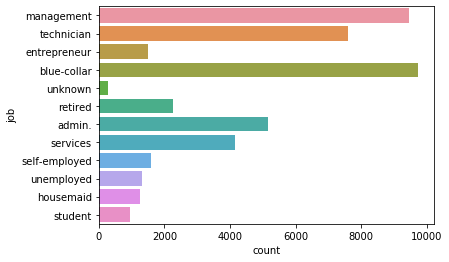

In [47]:
sns.countplot(y='job', data=Bank_df)

In [48]:
Bank_df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

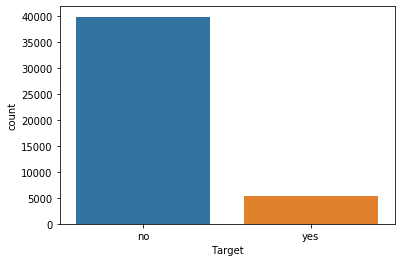

In [49]:
# Ploting the (yes/no) from the class 'Target'
sns.countplot(x='Target', data=Bank_df)

In [50]:
Bank_df.Target.value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

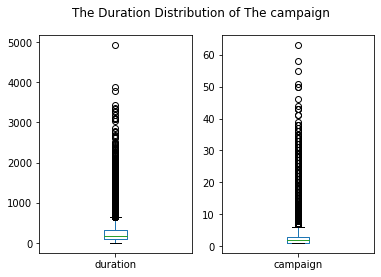

In [51]:
# The distribution of compaign duration.
dist_cam_dur = Bank_df[['duration', 'campaign']].plot(kind= 'box', subplots = True,
layout = (1,2),sharex = False, sharey = False,title='The Duration Distribution of The campaign')
plt.show

## <a id='link7'>Univariate Analysis.</a> 

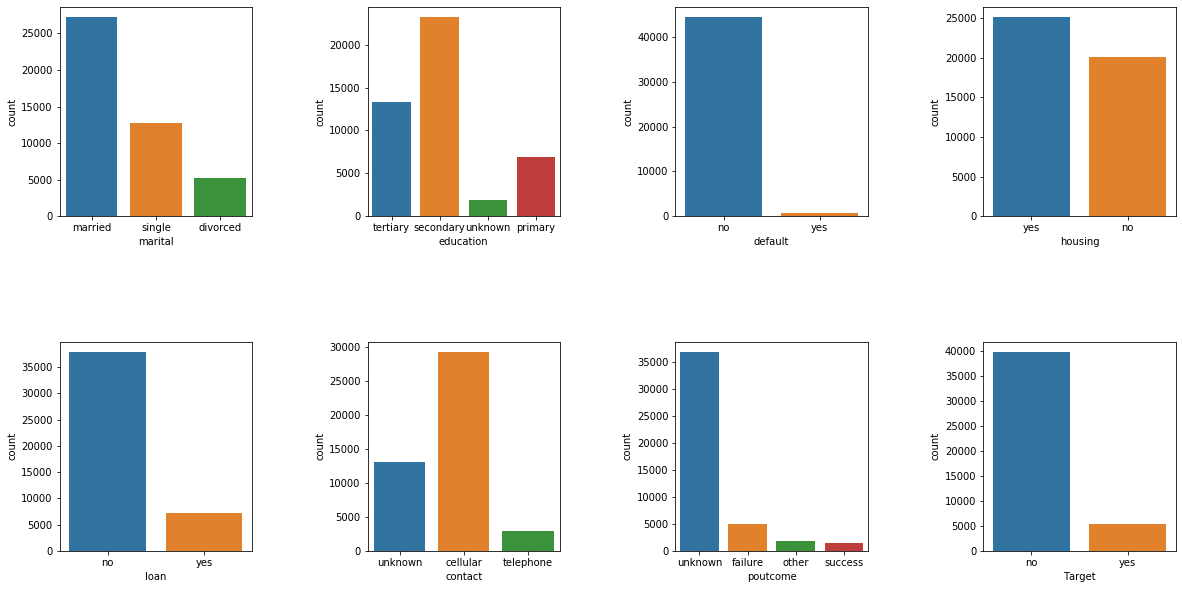

In [87]:
# Analyzing the distributions of particular attributes of continuous variables.
fig=plt.figure(figsize=(20,10))
fig.subplots_adjust(wspace=0.6,hspace=0.6)
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,4,i+1)
    sns.countplot(df[col])

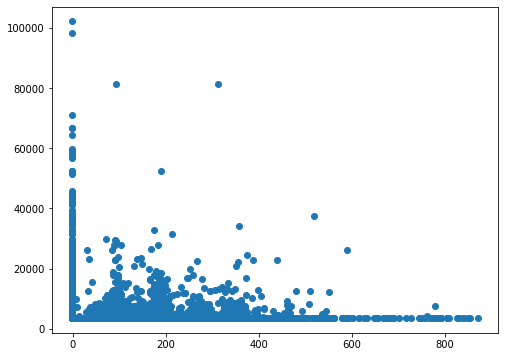

In [88]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(df['pdays'], df['balance'])

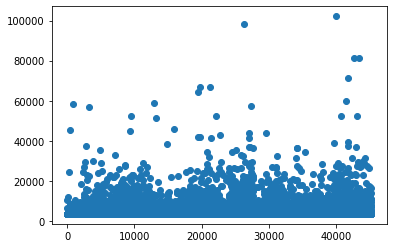

In [90]:
plt.scatter(df.index,df['balance'])
plt.show()

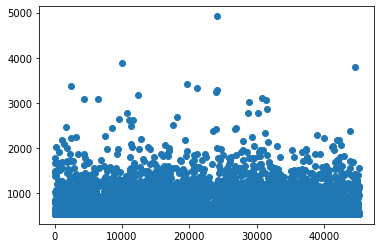

In [91]:
plt.scatter(df.index,df['duration'])
plt.show()

# Observation.

The above scatterplots visualize the relationship between two quantitative variables. the data are displayed as a calculation
of points and any points that fall outside the general clustering of the variables may indicate.

 
 ## <a id='link4'> Transposing index and columns.</a> 

In [120]:
Bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


## Observation.
by visualizing and observing on the printed out putt above the dataset it clearly indicates there is an outlier in the 
dataset distributions if you notice that between min 25% and max 75% in the Age and balance also between the min and max of the day and duration column and, the between the min and max of pdays in negative and there is an imbalance between both 
campaigns hence we need, to fix this data pollutions before cay on in order to achieve the accuracy in our model prediction.

## Identifying Outliers with interquartile Range (IQR)

By calculating the differences between the 75th and 25th percentiles. it is represented by the formula **IQR = Q3 - Q1.** The lines of code below calculate and print the inequalities range for each of the variables in the dataset.

In [121]:
# Calculating the interquartile Range. (IQR)
Q1 = Bank_df.quantile(0.25)
Q3 = Bank_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


# Outlier Treatment.

will use Diffrent Treatment Techniques To Fix the Outlier as follow:
* Quantile-based Flooring and Capping.
* Trimminig.
* IQR Score.
* Log Transformation.
* Replacing Outliers with Median value.


## Quantile-Based Flooring and Capping Technique.
In this technique, we will do the flooring (e.g., 10%) for the lower value and capping(e.g., 90% of the higher values.
the line of code below prints the 10% and 90% Quantile-Based flooring and capping.

In [122]:
print(Bank_df['age'].quantile(0.10))
print(Bank_df['age'].quantile(0.90))

29.0
56.0


In [123]:
print(Bank_df['balance'].quantile(0.10))
print(Bank_df['balance'].quantile(0.90))

0.0
3574.0


In [124]:
print(Bank_df['duration'].quantile(0.10))
print(Bank_df['duration'].quantile(0.90))

58.0
548.0


In [125]:
print(Bank_df['campaign'].quantile(0.10))
print(Bank_df['campaign'].quantile(0.90))

1.0
5.0



* Now we will remove the outliers, as shown in the lines of code below. Finally, will calculate the skewness value again, 
  which comes out much better.

In [126]:
Bank_df['balance'] = np.where(Bank_df['balance'] <3574.0, 3574.0,Bank_df['balance'])
print(Bank_df['balance'].skew())

13.799830364776021


In [127]:
Bank_df['age'] = np.where(Bank_df['age'] <29.0, 29.0,Bank_df['age'])
Bank_df['age'] = np.where(Bank_df['age'] <56.0, 56.0,Bank_df['age'])
print(Bank_df['age'].skew())

7.363634091514352


In [128]:
Bank_df['duration'] = np.where(Bank_df['duration'] <58.0, 58.0,Bank_df['duration'])
Bank_df['duration'] = np.where(Bank_df['duration'] <548.0, 548.0,Bank_df['duration'])
print(Bank_df['duration'].skew())

8.006654724572085


## Trimming

In [129]:
index = Bank_df[(Bank_df['age'] >= 100)|(Bank_df['age'] <= 18)].index
Bank_df.drop(index, inplace=True)
Bank_df['age'].describe()

count    45211.000000
mean        56.512751
std          2.528324
min         56.000000
25%         56.000000
50%         56.000000
75%         56.000000
max         95.000000
Name: age, dtype: float64

## IQR Score


This technique uses the IQR scores calculated earlier to remove outliers. the rule of the thumb is that anything not in the range of (Q1-1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed. below line of code removes outliers based on the IQR range and sores the result in the dataFrame 'df_out' and the second line of the code prints the shae of the data.

In [130]:
df_out = Bank_df[~((Bank_df < (Q1 - 1.5* IQR)) | (Bank_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(0, 17)


### will describe the dataset after the treatment of the outliers.

In [131]:
Bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,56.512751,2.528324,56.0,56.0,56.0,56.0,95.0
balance,45211.0,3991.568778,2372.088837,3574.0,3574.0,3574.0,3574.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,579.325098,144.306412,548.0,548.0,548.0,548.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [132]:
df = Bank_df.copy()
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58.0,management,married,tertiary,no,3574.0,yes,no,unknown,5,may,548.0,1,-1,0,unknown,no
1,56.0,technician,single,secondary,no,3574.0,yes,no,unknown,5,may,548.0,1,-1,0,unknown,no
2,56.0,entrepreneur,married,secondary,no,3574.0,yes,yes,unknown,5,may,548.0,1,-1,0,unknown,no
3,56.0,blue-collar,married,unknown,no,3574.0,yes,no,unknown,5,may,548.0,1,-1,0,unknown,no
4,56.0,unknown,single,unknown,no,3574.0,no,no,unknown,5,may,548.0,1,-1,0,unknown,no
5,56.0,management,married,tertiary,no,3574.0,yes,no,unknown,5,may,548.0,1,-1,0,unknown,no
6,56.0,management,single,tertiary,no,3574.0,yes,yes,unknown,5,may,548.0,1,-1,0,unknown,no
7,56.0,entrepreneur,divorced,tertiary,yes,3574.0,yes,no,unknown,5,may,548.0,1,-1,0,unknown,no
8,58.0,retired,married,primary,no,3574.0,yes,no,unknown,5,may,548.0,1,-1,0,unknown,no
9,56.0,technician,single,secondary,no,3574.0,yes,no,unknown,5,may,548.0,1,-1,0,unknown,no


### Deep observation in  the pdays column individually again, 
**This time limiting to the relevant values of pdays.** 
**what difference between the  mean and the median values?** 

In [133]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [134]:
# Checking for negative values in 'Pdays' column'.
df.pdays.value_counts().head(1)

-1    36954
Name: pdays, dtype: int64

In [135]:
# the following code to check the mean valuess and  if we can replace the negative values in the 'pdays' with the mean.
df['pdays'].mean()

40.19782796222158

In [136]:
# the following code to check the median valuess and  if we can replace the negative values in the 'pdays' with the median.
df['pdays'].median()
#the median results shows gegative value in median so we will not use it. 

-1.0

In [137]:
# limiting the relevant values of pdays.
df_up = df[df.pdays != -1]
df_up.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

## Observation.

The results if we not considering the attribute value (-1) in the ‘pdays’ column. 
By comparing the difference between the mean and the median values before and now will notice a
huge difference in values results. Before the mean was 40 and the median was -1, by limiting the value -1 
the mean value changed to 224 and the median 194.

## <a id='link5'>Checking For Dataset Error, Null Values, Duplicates & Missing Values.</a>  

In [138]:
# Checking If there are any null values in the dataset.
df.isnull().values.any() 

False

In [139]:
# the following code to check missing values in the datasets. 
df.isnull().sum() 
# Results no missing values.

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [140]:
# The following code to check duplicates in the datasets.
dupes = df.duplicated()
sum(dupes) 

# Results duplicates.

8401

In [141]:
df.drop_duplicates() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58.0,management,married,tertiary,no,3574.0,yes,no,unknown,5,may,548.0,1,-1,0,unknown,no
1,56.0,technician,single,secondary,no,3574.0,yes,no,unknown,5,may,548.0,1,-1,0,unknown,no
2,56.0,entrepreneur,married,secondary,no,3574.0,yes,yes,unknown,5,may,548.0,1,-1,0,unknown,no
3,56.0,blue-collar,married,unknown,no,3574.0,yes,no,unknown,5,may,548.0,1,-1,0,unknown,no
4,56.0,unknown,single,unknown,no,3574.0,no,no,unknown,5,may,548.0,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,56.0,technician,married,tertiary,no,3574.0,no,no,cellular,17,nov,977.0,3,-1,0,unknown,yes
45207,71.0,retired,divorced,primary,no,3574.0,no,no,cellular,17,nov,548.0,2,-1,0,unknown,yes
45208,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184,3,success,yes
45209,57.0,blue-collar,married,secondary,no,3574.0,no,no,telephone,17,nov,548.0,4,-1,0,unknown,no


## <a id='link8'> Bi-variate analysis.</a> 


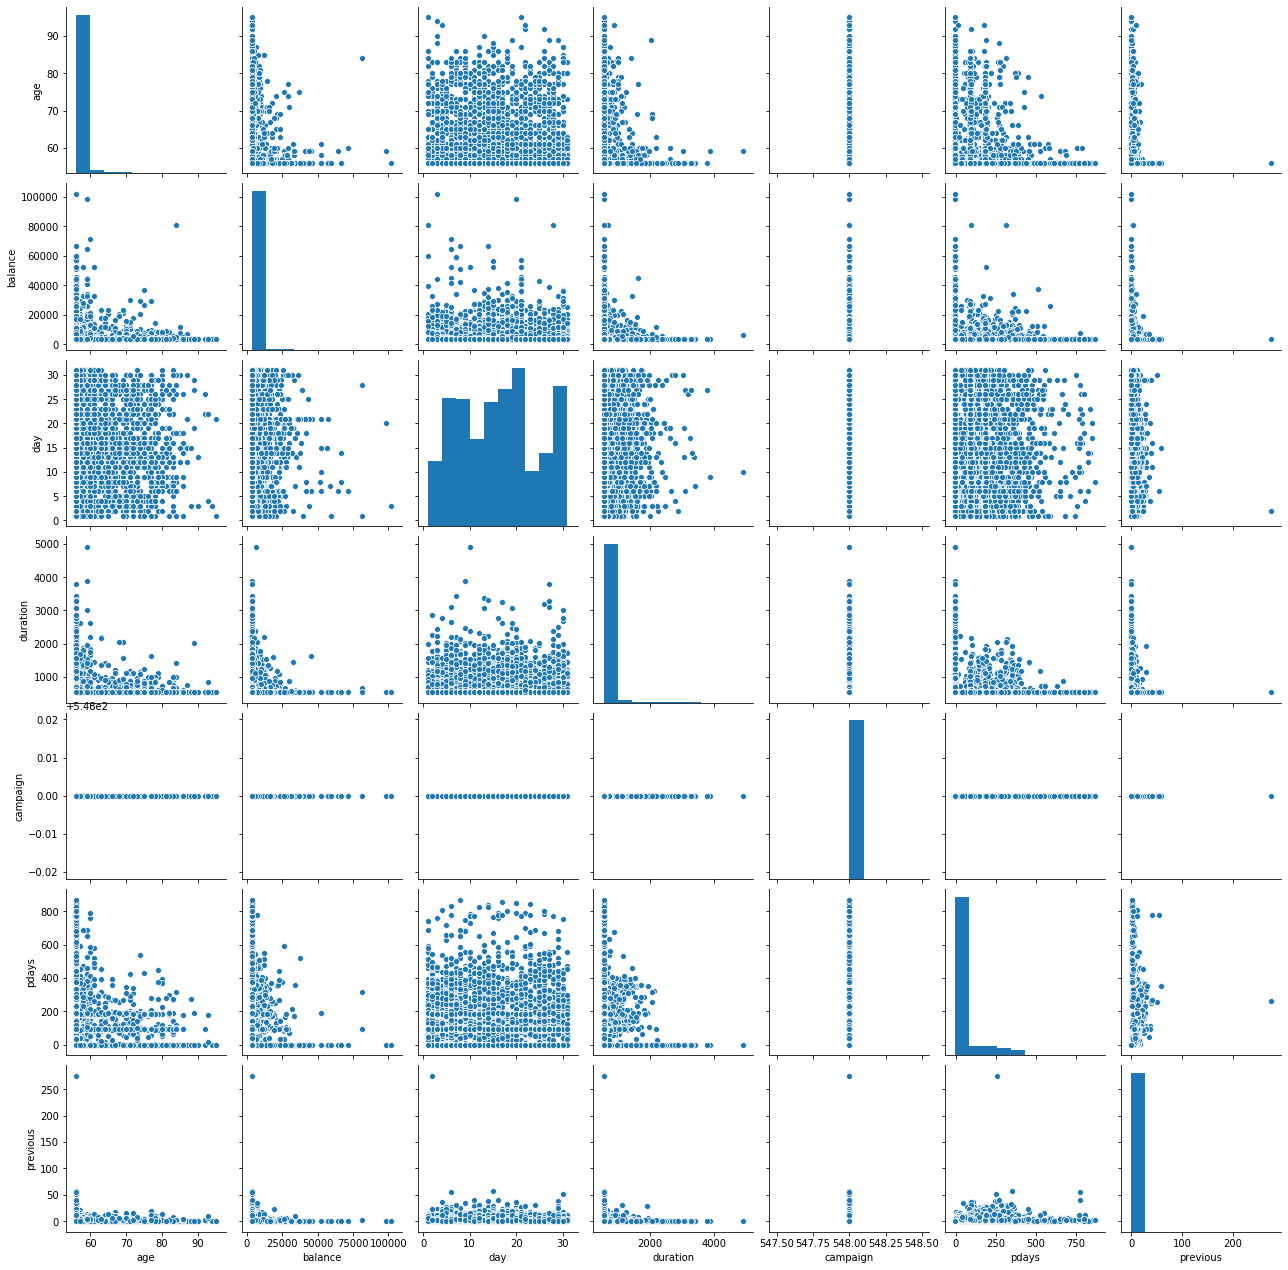

In [81]:
# The following code to plot
sns.pairplot(df)

#### We can observe that the data here are not symmetric to find out more will check the correlation matrix to look into details.

## <a id='link10'> Checking for correlation.</a>

In [27]:
Bank_df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.052800,-0.018257,0.014778,-0.031024,0.019296,0.034998
balance,0.052800,1.000000,0.000634,0.004405,-0.004116,-0.004144,0.003606
day,-0.018257,0.000634,1.000000,-0.006536,0.162490,-0.093044,-0.051710
duration,0.014778,0.004405,-0.006536,1.000000,-0.008888,-0.015002,-0.007815
campaign,-0.031024,-0.004116,0.162490,-0.008888,1.000000,-0.088628,-0.032855
pdays,0.019296,-0.004144,-0.093044,-0.015002,-0.088628,1.000000,0.454820
previous,0.034998,0.003606,-0.051710,-0.007815,-0.032855,0.454820,1.000000


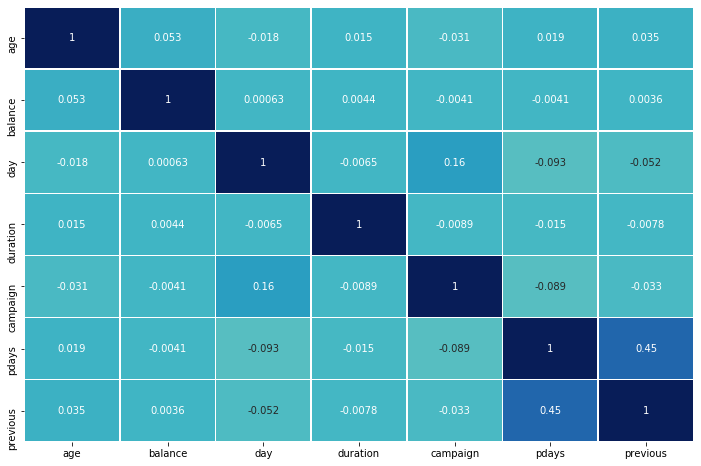

In [28]:
# Checking the correlation in praphical representation.
plt.figure(figsize=(12,8))
sns.heatmap(Bank_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

## Observation.

The above the plots heatmap and the pairplots shows the relationships between its dataset distributions numerical variables and the distribution of the response variable also the correlation matrix contains 8 categorical variables and 9 numerical variables as its features and a **(Target)** binary category as its response variable shows the highly unbalanced distribution of its binary classes also its indicates the relationships between the data are non-linear.

The data is not normally distributed so in order to fit machine learning algorithms, all the categorical variables and the response variable (Target) to be encoded into numerical this dataset contains missing data on one column numerical feature 
**(pdays)** it indicates the number of days that passed by after the client was last contacted from a previous campaign it was coded as **(unknown)** if the contact never happened. in order to implement the machine learning algorithms, it is important first to impute the missing values of the feature 'pdays' to maximize the prediction accuracy.


 ## <a id='link9'> Fixing Dataset Errors.</a> 


The dataset contains missing data on one numerical feature: 'pdays'. This feature indicates the number of days that passed by after the client was last contacted from a previous campaign- it was coded as '-1' if the contact never happened. Over 90% of the records show a number missing for the pdays. 
In order to implement the machine learning algorithms, will impute the missing values of this feature in a 
way to maximize its prediction accuracy as follows:

**Will use the following approaches with the Logistic Regression algorithm:**

* Replace class 'Target (yes / no) Column into binary format (1,0).
* Creating a new copy of dataset from the original dataset Bank_df with the name 'df'
* Leave the value in 'pdays as (-1) or
* Imput as the column mean or
* Imput as zero or
* Remove the column from dataset

## Fixing The Negative Values in The Dataset.

* We will try three different methods to fix and impute this values.
    * To replace the negative values with the median.
    * To replace the negative values with the mean.
    * To replace the negative values with the absolute value.
* Printing the data type after the imputing.


In [142]:
# Printing data types.
df.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign       int64
pdays          int64
previous       int64
poutcome      object
Target        object
dtype: object

In [143]:
# Printing negative indexs.
neg_ind = df[df['pdays'] <0].index
neg_ind

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            45196, 45197, 45198, 45200, 45202, 45203, 45205, 45206, 45207,
            45209],
           dtype='int64', length=36954)

In [144]:
# Printing negative indexes.
neg_ind = df[df['pdays'] >-1].index
neg_ind

Int64Index([24060, 24062, 24064, 24072, 24077, 24080, 24086, 24122, 24127,
            24136,
            ...
            45190, 45191, 45193, 45194, 45195, 45199, 45201, 45204, 45208,
            45210],
           dtype='int64', length=8257)

## Imputing 'pdays' values with the mean.  
* Will use diffrent ways of imputing the attributes. 
* data type chaning.
* Imputing the  **(-1)**  in the 'pdays' column with the **mean** of the same column value accordingly.

In [145]:
# Changing 'pdays' dtypes 
df['pdays'] = df['pdays'].astype(int)

In [146]:
# Changing 'pdays' dtypes 
df['campaign'] = df['campaign'].astype(int)

In [147]:
# imputing the 'pdays' to absolute values.
df['balance'].abs()

0        3574.0
1        3574.0
2        3574.0
3        3574.0
4        3574.0
          ...  
45206    3574.0
45207    3574.0
45208    5715.0
45209    3574.0
45210    3574.0
Name: balance, Length: 45211, dtype: float64

In [148]:
# imputing the 'duration' to absolute values
df['duration'].abs()

0         548.0
1         548.0
2         548.0
3         548.0
4         548.0
          ...  
45206     977.0
45207     548.0
45208    1127.0
45209     548.0
45210     548.0
Name: duration, Length: 45211, dtype: float64

In [149]:
df.pdays.mean()

40.19782796222158

In [150]:
df.loc[df.pdays == -1, 'pdays'] = df.pdays.mean()

In [151]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58.0,management,married,tertiary,no,3574.0,yes,no,unknown,5,may,548.0,1,40.197828,0,unknown,no
1,56.0,technician,single,secondary,no,3574.0,yes,no,unknown,5,may,548.0,1,40.197828,0,unknown,no
2,56.0,entrepreneur,married,secondary,no,3574.0,yes,yes,unknown,5,may,548.0,1,40.197828,0,unknown,no
3,56.0,blue-collar,married,unknown,no,3574.0,yes,no,unknown,5,may,548.0,1,40.197828,0,unknown,no
4,56.0,unknown,single,unknown,no,3574.0,no,no,unknown,5,may,548.0,1,40.197828,0,unknown,no


# <a id='link11'>Get Data Ready & Building Model using Sklearn Libraries.</a>

**Deliverable 2–  (create the ensemble model)**

•	First create models using Logistic Regression and Decision Tree algorithm. Note the 
    model performance by using different matrices. Use confusion matrix to evaluate 
    class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the 
    model.
    
•	Build the ensemble models (Bagging and Boosting) and note the model performance 
    by using different matrices. Use same metrics as in above model. (at least 3 
    algorithms).
    
**Deliverable 3–  (Prepare the data for analytics)**

* nsure the attribute types are correct. If not, take appropriate actions.
* Get the data model ready. 
* Transform the data i.e. scale / normalize if required
* Create the training set and test set in ratio of 70:30


#### Classifiers: Based on the values different parameters can be used concluded to the following classifiers for binary classification.

* LogisticsRegression 
* train_test_split
* Linear Discriminant analysis
* AdaBoostClassifier
* Gradient Boosting
* Random Forest Classifier
* DecisionTreeClassifier
* cross_val_score
* BaggingClassifier
* Support vector classifier
* VotingClassifier
* classification_report
* cross_val_score
* And performance matrix by using precision and recall calculation along with **roc_auc_score & accuracy_score**


In [152]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58.0,management,married,tertiary,no,3574.0,yes,no,unknown,5,may,548.0,1,40.197828,0,unknown,no
1,56.0,technician,single,secondary,no,3574.0,yes,no,unknown,5,may,548.0,1,40.197828,0,unknown,no
2,56.0,entrepreneur,married,secondary,no,3574.0,yes,yes,unknown,5,may,548.0,1,40.197828,0,unknown,no
3,56.0,blue-collar,married,unknown,no,3574.0,yes,no,unknown,5,may,548.0,1,40.197828,0,unknown,no
4,56.0,unknown,single,unknown,no,3574.0,no,no,unknown,5,may,548.0,1,40.197828,0,unknown,no


In [153]:
# Delete the rows which column 'poutcome' contains 'other'
condition = df.poutcome == 'other'
df = df.drop(df[condition].index, axis = 0, inplace = False)

df[['job','education']] = df[['job','education']].replace(['unknown'],'other')

In [154]:
df[['poutcome']] = df[['poutcome']].replace(['unknown'],'other')

In [155]:
df[['contact']] = df[['contact']].replace(['unknown'],'other')

In [156]:
#  Drop customer values with 'other' education
condition2 = (df['education'] == 'other')
df = df.drop(df[condition2].index, axis = 0, inplace = False)

In [157]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58.0,management,married,tertiary,no,3574.0,yes,no,other,5,may,548.0,1,40.197828,0,other,no
1,56.0,technician,single,secondary,no,3574.0,yes,no,other,5,may,548.0,1,40.197828,0,other,no
2,56.0,entrepreneur,married,secondary,no,3574.0,yes,yes,other,5,may,548.0,1,40.197828,0,other,no
5,56.0,management,married,tertiary,no,3574.0,yes,no,other,5,may,548.0,1,40.197828,0,other,no
6,56.0,management,single,tertiary,no,3574.0,yes,yes,other,5,may,548.0,1,40.197828,0,other,no


### See the distribution of 'Target' variable 

In [108]:
df.groupby('Target').agg({'Target': 'count'})

,Target
Target,
no,36836
yes,4743


In [109]:
df.poutcome.head()

0    other
1    other
2    other
5    other
6    other
Name: poutcome, dtype: object

In [110]:
df.education.head()

0     tertiary
1    secondary
2    secondary
5     tertiary
6     tertiary
Name: education, dtype: object

In [111]:
df.job.head()

0      management
1      technician
2    entrepreneur
5      management
6      management
Name: job, dtype: object

In [112]:
# The following code to impute the negative values in 'pdays' with the absolute method.
df['pdays'].abs()

0         40.197828
1         40.197828
2         40.197828
5         40.197828
6         40.197828
            ...    
45205     40.197828
45206     40.197828
45207     40.197828
45208    184.000000
45209     40.197828
Name: pdays, Length: 41579, dtype: float64

## Converting categorical data into dummy variables.

### Dataset One-hot Encoded.

In [158]:
# Converting object type into one-hot Encoded data using get_dummies method.
df = pd.get_dummies(df, columns=['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome' ])

In [159]:
# Checking the dataset after converting the categorical into one-Hot Encoded dummes successfully.
df.head()

,age,balance,day,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,58.0,3574.0,5,548.0,1,40.197828,0,no,0,0,...,0,0,0,1,0,0,0,0,1,0
1,56.0,3574.0,5,548.0,1,40.197828,0,no,0,0,...,0,0,0,1,0,0,0,0,1,0
2,56.0,3574.0,5,548.0,1,40.197828,0,no,0,0,...,0,0,0,1,0,0,0,0,1,0
5,56.0,3574.0,5,548.0,1,40.197828,0,no,0,0,...,0,0,0,1,0,0,0,0,1,0
6,56.0,3574.0,5,548.0,1,40.197828,0,no,0,0,...,0,0,0,1,0,0,0,0,1,0


In [160]:
# Printing the data type after the imputing.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41579 entries, 0 to 45209
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  41579 non-null  float64
 1   balance              41579 non-null  float64
 2   day                  41579 non-null  int64  
 3   duration             41579 non-null  float64
 4   campaign             41579 non-null  int32  
 5   pdays                41579 non-null  float64
 6   previous             41579 non-null  int64  
 7   Target               41579 non-null  object 
 8   job_admin.           41579 non-null  uint8  
 9   job_blue-collar      41579 non-null  uint8  
 10  job_entrepreneur     41579 non-null  uint8  
 11  job_housemaid        41579 non-null  uint8  
 12  job_management       41579 non-null  uint8  
 13  job_other            41579 non-null  uint8  
 14  job_retired          41579 non-null  uint8  
 15  job_self-employed    41579 non-null 

In [161]:
df.dtypes

age                    float64
balance                float64
day                      int64
duration               float64
campaign                 int32
pdays                  float64
previous                 int64
Target                  object
job_admin.               uint8
job_blue-collar          uint8
job_entrepreneur         uint8
job_housemaid            uint8
job_management           uint8
job_other                uint8
job_retired              uint8
job_self-employed        uint8
job_services             uint8
job_student              uint8
job_technician           uint8
job_unemployed           uint8
marital_divorced         uint8
marital_married          uint8
marital_single           uint8
education_primary        uint8
education_secondary      uint8
education_tertiary       uint8
default_no               uint8
default_yes              uint8
housing_no               uint8
housing_yes              uint8
loan_no                  uint8
loan_yes                 uint8
contact_

In [162]:
# Changing 'age' dtypes 
df['age'] = df['age'].astype(int)

In [163]:
# Changing 'balance' dtypes 
df['balance'] = df['balance'].astype(int)

In [164]:
# Changing 'duration' dtypes 
df['duration'] = df['duration'].astype(int)

In [165]:
# Changing 'pdays' dtypes 
df['pdays'] = df['pdays'].astype(int)

In [166]:
df.shape

(41579, 50)

In [167]:
df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'Target', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_other', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_other', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success'],
      dtype='object')

In [168]:
df.Target.value_counts()

no     36836
yes     4743
Name: Target, dtype: int64

### Will convert the class this target variable 'Target' into binary algorithm format 0's and 1's

In [169]:
# Replace class column 'Target' into binary format.
df.Target.replace(('yes', 'no'), (1,0), inplace=True)

In [170]:
df.dtypes

age                    int32
balance                int32
day                    int64
duration               int32
campaign               int32
pdays                  int32
previous               int64
Target                 int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_other              uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
default_no             uint8
default_yes            uint8
housing_no             uint8
housing_yes            uint8
loan_no                uint8
loan_yes               uint8
contact_cellular       uint8
contact_other          uint8
contact_teleph

In [171]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,58,3574,5,548,1,40,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,56,3574,5,548,1,40,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,56,3574,5,548,1,40,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,56,3574,5,548,1,40,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
6,56,3574,5,548,1,40,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [172]:
# Printing the crostab in the dataset to display attributes with respect to class 'Target' class variable 'y,n'
pd.crosstab(index=Bank_df['education'], columns=Bank_df['Target'])

Target,no,yes
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


In [173]:
# Printing the crostab in the dataset to display attributes with respect to class 'Target' class variable 'y,n'
pd.crosstab(index=Bank_df['loan'], columns=Bank_df['Target'])

Target,no,yes
loan,,
no,33162,4805
yes,6760,484


In [174]:
# Printing the crostab in the dataset to display attributes with respect to class 'Target' class variable 'y,n'
pd.crosstab(index=Bank_df['housing'], columns=Bank_df['Target'])

Target,no,yes
housing,,
no,16727,3354
yes,23195,1935


In [175]:
# Printing the crostab in the dataset to display attributes with respect to class 'Target' class variable 'y,n'
pd.crosstab(index=Bank_df['default'], columns=Bank_df['Target'])

Target,no,yes
default,,
no,39159,5237
yes,763,52


## <a id='link12'> Logistic Regression.</a>

### Split the df into training and test set in the ratio of 70:30

In [118]:
df_new = df.copy()
df_new.head()

,No,Yes
No,10880,167
Yes,1162,265


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc

In [61]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [62]:
# Define X and Y variables Predictor feature columns (0 X m)
x=df.drop('Target', axis=1)
y=df['Target'] # Predicted class (1=True, 0=False) (1 x m )


In [63]:
# Data splitting.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
41278,56,3574,25,548,6,95,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1643,56,3574,9,548,1,40,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
21232,60,3574,18,548,5,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15458,56,3574,18,548,2,40,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
25554,56,3574,19,548,1,40,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [64]:
df.dtypes

age                    int32
balance                int32
day                    int64
duration               int32
campaign               int32
pdays                  int32
previous               int64
Target                 int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_other              uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
default_no             uint8
default_yes            uint8
housing_no             uint8
housing_yes            uint8
loan_no                uint8
loan_yes               uint8
contact_cellular       uint8
contact_other          uint8
contact_teleph


## <a id='link13'> Logistic Regression Prediction Model .</a>

In [65]:
# import of sklearn packages.
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegressionCV

# Fitting the model into train data.
logreg = LogisticRegression(random_state=7)
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
# Feature Scaling.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [67]:
# Fit the model into train.
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

# Predict on test.
y_predict = model.predict(x_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2       3         4         5         6  \
0  0.132255 -0.009795  0.038759  0.7477 -0.264619  0.001577  0.055566   

          7        8         9  ...        40        41        42        43  \
0  0.040961 -0.02176 -0.015068  ...  0.213548  0.182698 -0.007078 -0.111208   

         44        45        46        47        48  intercept  
0  0.139994  0.119079 -0.100226 -0.090899  0.352816  -2.592592  

[1 rows x 50 columns]


In [68]:
model_list=[]
model_f1_score=[]
model_accuracy_score=[]

In [69]:
print('data is in training test', len(x_train)/len(df)*100, '%')
print('data is in test set', len(x_test)/len(df)*100, '%')

data is in training test 69.99927848192597 %
data is in test set 30.000721518074023 %


In [70]:
# Checking the model
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
model.coef_

array([[ 0.13225451, -0.00979489,  0.03875855,  0.74769955, -0.26461885,
         0.00157745,  0.05556629,  0.04096149, -0.02175953, -0.01506773,
        -0.03654626,  0.00856553, -0.03473792,  0.0293421 , -0.01764592,
        -0.03730298,  0.06892484, -0.01159214,  0.03785364,  0.02074764,
        -0.08380127,  0.07649762, -0.10587442,  0.01131146,  0.07150904,
        -0.00798563,  0.00798563,  0.15535711, -0.15535711,  0.06562971,
        -0.06562971,  0.30987159, -0.35128107,  0.0486431 ,  0.11105926,
        -0.14445606,  0.06459968,  0.04613122, -0.13610843, -0.1404605 ,
         0.21354791,  0.18269756, -0.00707762, -0.11120805,  0.13999426,
         0.11907857, -0.10022584, -0.09089937,  0.35281618]])

## Logistic Regression model to prediction.

In [72]:
# Append model list.
model_list.append('LogisticRegressiono')
lm =LogisticRegression()

In [73]:
# fiting the model on train data.
lm.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
yhat_lm=lm.predict(x_test)

In [75]:
# Displaying the confusion matrix.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat_lm)

array([[10815,   232],
       [ 1013,   414]], dtype=int64)

In [76]:
# Calculating the area under the curve ROC.
from sklearn.metrics import roc_curve, auc
LogReg_prob=model.predict_proba(x_test)
fpr1,tpr1,thresholds=roc_curve(y_test,LogReg_prob[:,1])
roc_auc1=auc(fpr1,tpr1)
print('Area under the curve ROC : %f' % roc_auc1)

Area under the curve ROC : 0.870164


In [77]:
# Calculating the score.
lm_score=f1_score(y_test,yhat_lm)
model_f1_score.append(lm_score)
lm_score

0.39942112879884223

In [78]:
# Calculating the accuracy score.
lm_accuracy=accuracy_score(y_test,yhat_lm)
model_accuracy_score.append(lm_accuracy)
lm_accuracy

0.9001924001924002

In [79]:
# Printing the classification report.
print(classification_report(y_test,yhat_lm))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     11047
           1       0.64      0.29      0.40      1427

    accuracy                           0.90     12474
   macro avg       0.78      0.63      0.67     12474
weighted avg       0.88      0.90      0.88     12474



In [80]:
from sklearn import preprocessing  # import sklearn library.

col_name=df.columns                # Get the columns name from the df.
scaler=preprocessing.StandardScaler() # Creating the scaler object.
scaled_x_train=scaler.fit_transform(x_train) # Fit the data on the scaler object.
scaled_x_test=scaler.fit_transform(x_test)

In [81]:
# Fiting the model into train data.
model=LogisticRegression()
model.fit(scaled_x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
# Calculating the Area under the curve ROC.
from sklearn.metrics import roc_curve, auc
LogReg_prob=model.predict_proba(x_test)
fpr1,tpr1,thresholds1=roc_curve(y_test,LogReg_prob[:,1])
roc_auc1=auc(fpr1,tpr1)
print('Area under the curve ROC : %f' % roc_auc1)

Area under the curve ROC : 0.870142


## Confusion Matrix.

In [83]:
# Function to get the confusion metrex in proper format.
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
def draw_cm(actual, predicted):
    fig=plt.figure(figsize=(8,4))
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm, annot=True, fmt='2f', xticklabels=[0,1], yticklabels=[0,1])
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()


Trainig accuracy 0.5707266792647312

Trainig accuracy 0.5567580567580568

confusion Matrix


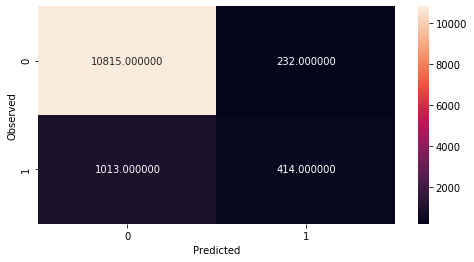

None

Recall: 0.29011913104414855

Precision: 0.6408668730650154

f1 score: 0.39942112879884223

Roc Auc Score: 0.6345589771270349



In [84]:
print('Trainig accuracy', logreg.score(x_train,y_train))
print()
print('Trainig accuracy', logreg.score(x_test,y_test))
print()
print('confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print('Recall:',recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print('f1 score:',f1_score(y_test,y_predict))
print()
print('Roc Auc Score:',roc_auc_score(y_test,y_predict))
print()

<function matplotlib.pyplot.show(*args, **kw)>

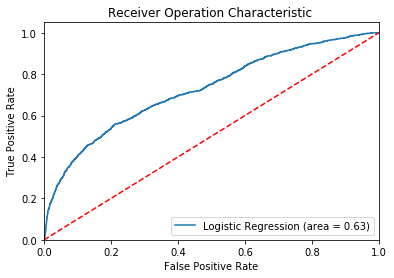

In [85]:
# # !pip install yellowbrick
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr,  tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operation Characteristic ')
plt.legend(loc='lower right')
plt.savefig('log_ROC')
plt.show

In [86]:
#Chacking logistic Regression Parameters.
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [87]:
train_score=[]
test_score=[]
solver = ['liblinear', 'saga'] #changing values of solver which works with 'L1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C =0.75,solver=i) # change penalty to 'L1'
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.901, 0.901]

[0.9, 0.9]


In [88]:
# Running Loop to check diffrent values of the 'Solver'
tree_score=[]
tree_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga'] 
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i) # This to check the values of the solver.
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.901, 0.901, 0.901, 0.901, 0.901, 0.901, 0.901]

[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]


In [89]:
#Change class weight to balanced 
model= LogisticRegression(random_state=42,penalty='l1',solver='liblinear', class_weight='balanced') 
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print('Training Accuracy',model.score(x_train,y_train))
print()
print('Test Accuracy',model.score(x_test,y_test))

Training Accuracy 0.8569661570176945

Test Accuracy 0.854978354978355


Training Accuracy 0.8570348737330356

Test Accuracy 0.8551386884720218

Confusion Matrix


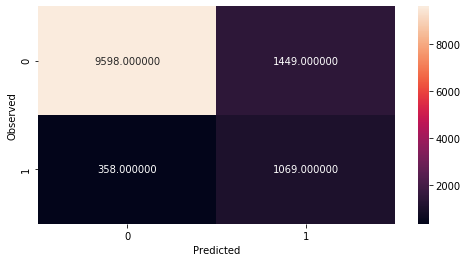

None

Recall: 0.7491240364400841

Precisim:: 0.42454328832406674

F1 Score: 0.5419518377693283

Roc Auc Score: 0.808978601907921


In [90]:
# Printing the final model
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', class_weight='balanced',C=0.5)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print('Training Accuracy', model.score(x_train, y_train))
print()
print('Test Accuracy', model.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print('Recall:',recall_score(y_test, y_predict))
print()
print('Precisim::',precision_score(y_test, y_predict))
print()
print('F1 Score:',f1_score(y_test, y_predict))
print()
print('Roc Auc Score:',roc_auc_score(y_test, y_predict))

In [91]:
#!pip install yellowbrick

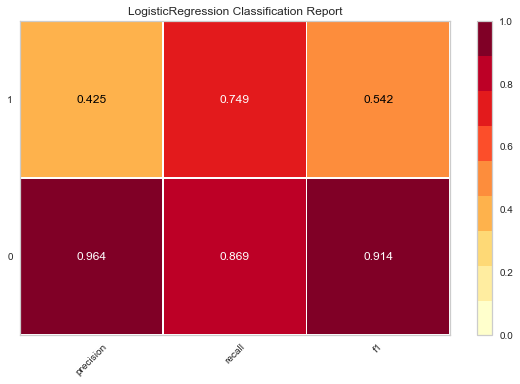

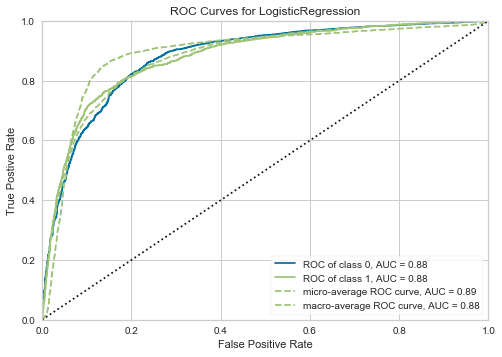

In [92]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visual model performance with yeilowbrick library.
viz = ClassificationReport(model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

In [93]:
# Build the logisticRegeression model
import statsmodels.api as sm
warnings.filterwarnings('ignore')

logit = sm.Logit(y_train, sm.add_constant(x_train))
lg = logit.fit()

         Current function value: 0.261709
         Iterations: 35


In [94]:
# Printing Logistic Regression Summary Report.
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

# Printing summary of the logistic Regression.
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.ch12.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                29105
Model:                          Logit   Df Residuals:                    29064
Method:                           MLE   Df Model:                           40
Date:                Wed, 07 Oct 2020   Pseudo R-squ.:                  0.2621
Time:                        13:30:07   Log-Likelihood:                -7617.1
converged:                      False   LL-Null:                       -10322.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5950      0.028    -94.279      0.000      -2.649      -2.541
x1             0.1323      0.020      6.534      0.000       0.093       0.172
x2            -0.0098      0.019     -0.506      0.6

## <a id='link14'>Decision Tree Modeling.</a>

### Split the df nto training and test set in the ratio of 70:30 (Training:Test).

In [95]:
# Spletting the data into training and test.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)

In [96]:
dTree = DecisionTreeClassifier(criterion= 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

### Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data

In [97]:
# splitting data into training and test set for independent attributes
n=df['Target'].count()
train_set = df.head(int(round(n*0.7))) # Up to the last initial training set row
test_set = df.tail(int(round(n*0.3))) # Past the last initial training set row

# capture the target column ("class") into separate vectors for training set and test set
train_labels = train_set.pop("Target")
test_labels = test_set.pop("Target")

## Build Decision Tree Model

In [98]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion= 'entropy')
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Print the accuracy of the model & print the confusion matrix

In [99]:
dt_model.score(test_set, test_labels)
test_pred = dt_model.predict(test_set)

In [100]:
# Print the importance of the features of the decision model.
print(pd.DataFrame(dt_model.feature_importances_, columns = ['Imp'], index = train_set.columns))

                          Imp
age                  0.017339
balance              0.030246
day                  0.120151
duration             0.466744
campaign             0.072536
pdays                0.007740
previous             0.001642
job_admin.           0.013674
job_blue-collar      0.016111
job_entrepreneur     0.004722
job_housemaid        0.003518
job_management       0.012075
job_other            0.000818
job_retired          0.002455
job_self-employed    0.002619
job_services         0.008557
job_student          0.003410
job_technician       0.016553
job_unemployed       0.006855
marital_divorced     0.010665
marital_married      0.015081
marital_single       0.010817
education_primary    0.010854
education_secondary  0.012828
education_tertiary   0.010508
default_no           0.001048
default_yes          0.004290
housing_no           0.010197
housing_yes          0.010308
loan_no              0.008101
loan_yes             0.009460
contact_cellular     0.007698
contact_ot

# Ensemble Techniques.

## <a id='link15'> Applying Ensemble Learning Techniques.</a> 

### Apply the Random forest model and print the accuracy of Random forest Model

In [101]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(criterion= 'entropy', class_weight={0:.5,1:.5}, max_depth= 5, min_samples_leaf=5)
rfc1 = rfc1.fit(train_set, train_labels)
test_pred = rfc1.predict(test_set)
rfc1.score(test_set, test_labels)

0.7403399070065737

In [102]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(train_set, train_labels)
test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)

0.7402597402597403

0.8856822190155523


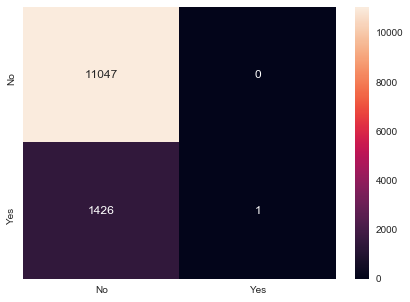

In [103]:
y_predict = rfc1.predict(x_test)
print(rfc1.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [104]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(train_set, train_labels)

test_pred = abcl.predict(test_set)
abcl.score(test_set , test_labels)

0.7402597402597403

0.11447811447811448


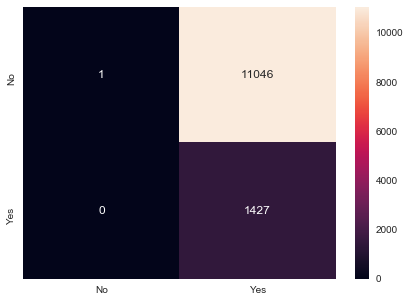

In [105]:
print(model.score(x_test, y_test))
y_predict = model.predict(x_test)

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0,1])

df = pd.DataFrame(cm, index= [i for i in ['No','Yes']],
                 columns = [i for i in ['No','Yes']])
plt.figure(figsize= (7,5))
sns.heatmap(df, annot=True ,fmt='g')

### Apply BaggingClassifier Algorithm and print the accuracy.

In [106]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=model, n_estimators=50,random_state=1)
bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)

0.8980278980278981


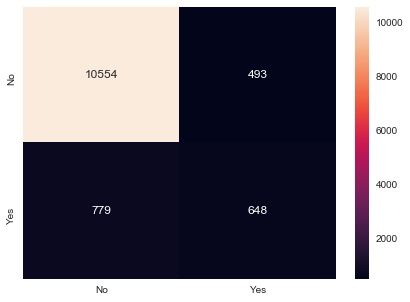

In [107]:
y_predict = bgcl.predict(x_test)
print(bgcl.score(x_test, y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0,1])

df_cm = pd.DataFrame(cm, index= [i for i in ['No','Yes']],
                     columns = [i for i in ['No','Yes']])
plt.figure(figsize= (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [108]:
test_pred = bgcl.predict(test_set)
bgcl.score(test_set, test_labels)

0.9260060926727594

### Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate= 0.05)
gbcl = gbcl.fit(train_set, train_labels)

In [110]:
test_pred = gbcl.predict(test_set)
gbcl.score(test_set, test_labels)

0.7466730800064133

0.8934583934583935


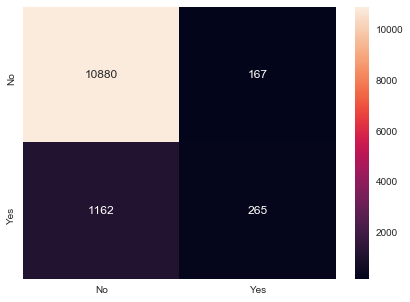

In [111]:
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict, labels=[0,1])
df = pd.DataFrame(cm, index= [i for i in ['No','Yes']],
                    columns = [i for i in ['No','Yes']])
plt.figure(figsize = (7,5))
sns.heatmap(df, annot=True ,fmt='g')

0.8934583934583935


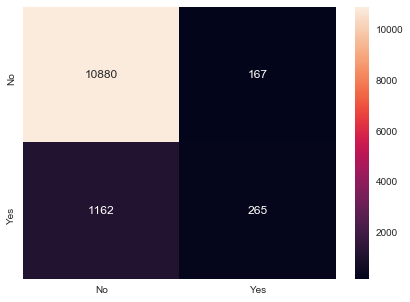

In [112]:
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict, labels=[0,1])
df = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df, annot=True ,fmt='g')

## Scoring our Decision Tree.

In [113]:
print(dt_model.score(x_train, y_train))
print(dt_model.score(x_test, y_test))

0.9203573269197732
0.9174282507615841


## Reducing over fitting (Regularization)

In [212]:
dTreeR = DecisionTreeClassifier(criterion= 'gini', max_depth= 3, random_state=1)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.9017007387046899
0.9025172358505692


# <a id='link17'>Conclusion.</a> 

The techniques and algorithms used in this project consist of **logistic regression** techniques such as confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score, and for decision **tree Decision** TreeClassifie and ensemble techniques such as Random Forest, Boosting Support vector, BaggingClassifier, AdaboostClassifier, GradientBoostingClassifier also **testing the models**  using different parameters hence without oversampling and parameters optimization all algorithms around 90% accuracy overall but 20% only sensitive on fitting and prediction of customers sign-ups but after rebalancing the training data and grid such cross-validation, all the algorithms except the support vector classifier showed improvement on balancing sensitive and top improvements were from the Gradient boosting.

in this project case study, we have applied different machine learning techniques to the Bank marketing dataset and explored the techniques that can be used to help the bank marketing team to conduct its marketing campaign.

* Many classification algorithms have been evaluated.
* Cross-validation was applied for parameter selection.
* Gradient Boosting is the best model for balancing sensitivity and interpretation of features.

By comparing the true values the prediction output on the test shows.

* The baseline model is accurate in making predictions overall it is able to predict correctly over 90% of the time hence it can only predict customer's sign-ups correctly around 20% to 23% of the time so the model is not informative enough to the bank marketing team goal.

* Gradient Boosting has been improved on prediction customers sign-ups correctly to 75% of the time and it is able to filter out those who will not sign-up 89% of the time.

* Finally, as shown above, both Random Forest and failure to identify those features which important impacts on the Target variable output providing very valuable insight to guide further marketing campaign.

# <a id='link18'>GitHub Repository & References.</a> 

* https://github.com/command20/This-repository-records-all-the-project-works-that-I-did-in-my-PGP-AIML-program-with-UT-Austin-and-G



* https://pandas.pydata.org/docs/getting_started/overview.html?highlight=saving%20loading

* https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

* https://www.w3schools.com/python/default.asp

* https://stackoverflow.com/questions/33957720/how-to-convert-column-with-dtype-as-object-to-string-in-pandas-dataframe

* https://thepythonguru.com/python-lambda-function/#:~:text=Python%20allows%20you%20to%20create,just%20like%20a%20normal%20function.&text=Also%20there%20is%20no%20need%20for%20any%20return%20statement%20in%20lambda%20function.

* https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

* https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034361&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9069735&gclid=CjwKCAjwtNf6BRAwEiwAkt6UQivaN7quq-bZJmVF_wVVTfzvzRMxhLG8Lf2lRLmn-BNfxUCTziFNXRoCaFEQAvD_BwE

* https://opentextbc.ca/introductorybusinessstatistics/chapter/regression-basics-2/

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html* 

* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

* https://www.modernanalyst.com/Careers/InterviewQuestions/tabid/128/ID/4904/Describe-the-difference-between-univariate-bivariate-and-multivariate-analysis.aspx#:~:text=You%20can%20think%20of%20the,analysis%20might%20be%20%22age%22.&text=Additionally%2C%20some%20ways%20you%20may,frequency%20polygons%2C%20and%20pie%20charts.

* https://www.datacamp.com/community/tutorials/decision-tree-classification-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377086&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9069735&gclid=Cj0KCQjw5eX7BRDQARIsAMhYLP-pR5lwJWbZLS65zozM-XfpdUFA1GtFcNOMeya9FYPslz4U1CaIhdUaAoHLEALw_wcB